<a href="https://colab.research.google.com/github/eduardocarbo/NewRepo/blob/master/An%C3%A1lisis_multivariable_en_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Llamado de librerías
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 
from pandas_profiling import ProfileReport

In [5]:
#Lectura del archivo 

bd = pd.read_csv('trees.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
bd.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [6]:
#Análisis de perfilado con pandas profiling
profile = ProfileReport(bd,title='Pandas Profiling -Trees', explorative=True)
profile.to_file('Pandas Profiling Report - Trees.html')
profile.to_widgets()

TypeError: ignored

In [7]:
#Descripción del dataset
bd.describe()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


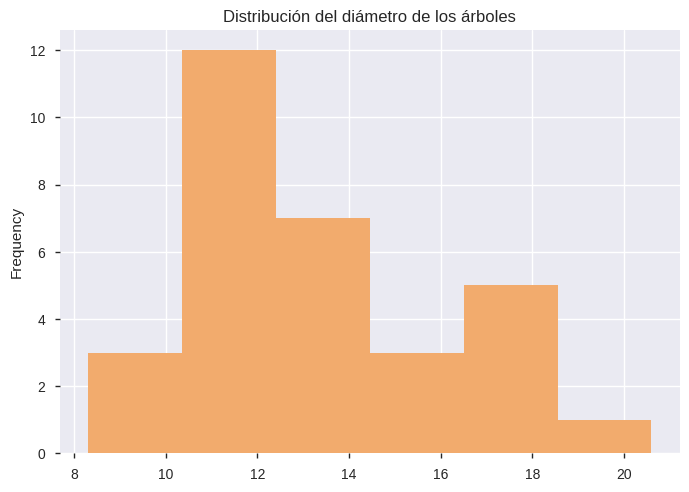

In [8]:
bd.Girth.plot.hist(bins=6, color='#F2AB6D')
plt.title('Distribución del diámetro de los árboles')
plt.show()
plt.close()

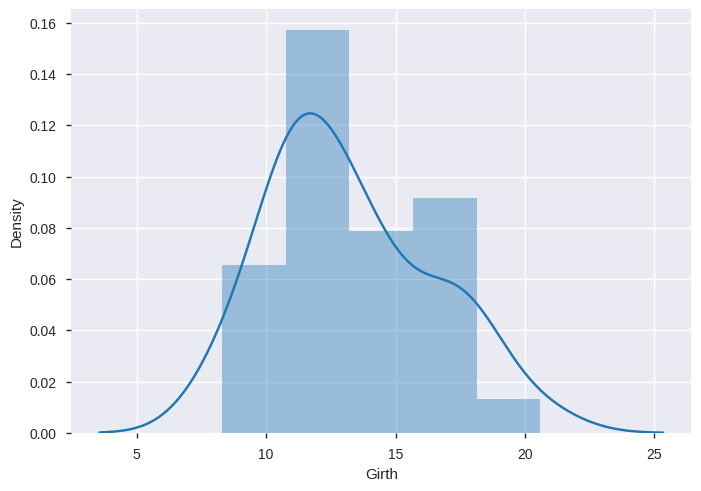

In [9]:
sns.distplot(bd['Girth']);
plt.show()
plt.close()

In [10]:
print("Skewness: %f" % bd['Girth'].skew())

Skewness: 0.553465


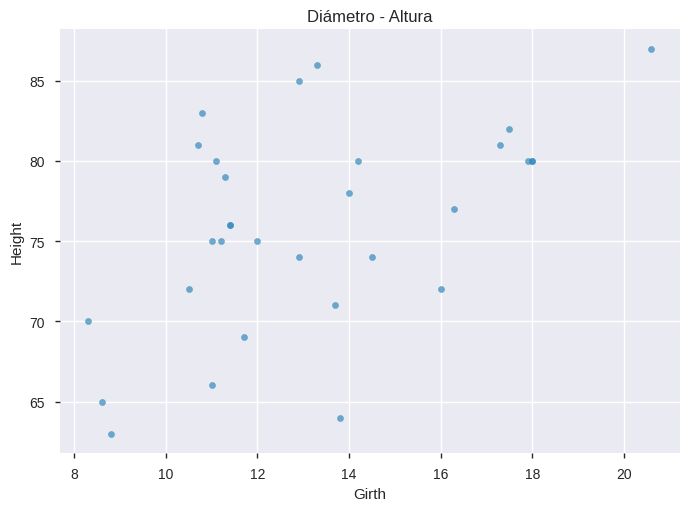

In [11]:
#Relación del diámetro con la altura de un árbol

bd.plot.scatter(x='Girth', y='Height', alpha=0.7);
plt.title('Diámetro - Altura')
plt.show()
plt.close()

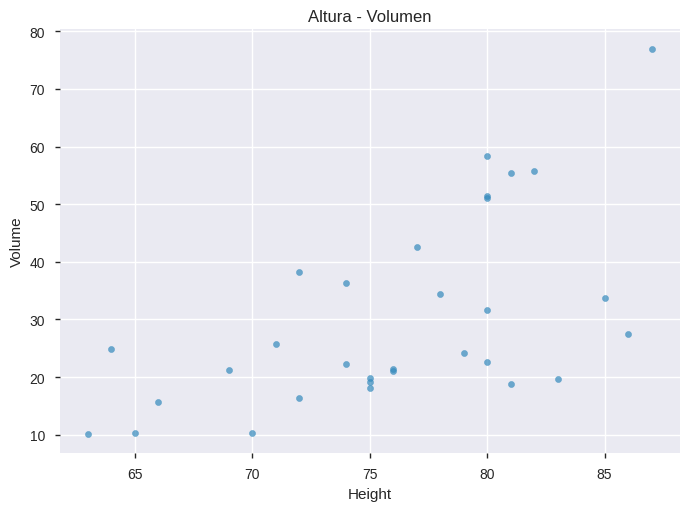

In [12]:
#Relación de altura con el volumen de un árbol

bd.plot.scatter(x='Height', y='Volume', alpha=0.7);
plt.title('Altura - Volumen')
plt.show()
plt.close()

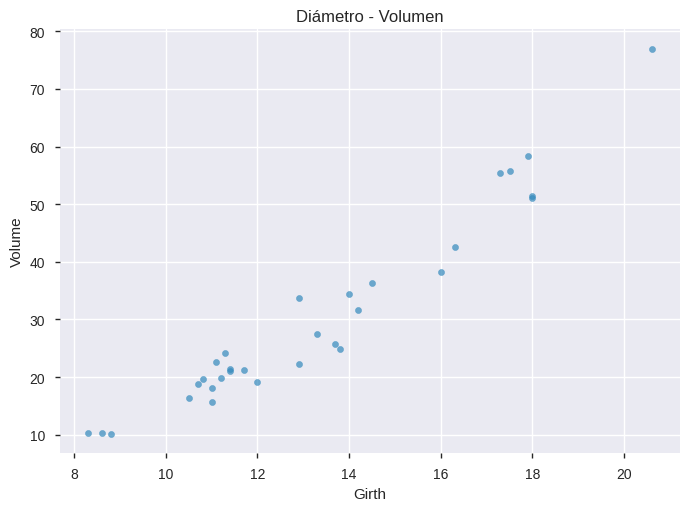

In [13]:
#Relación del diámetro con el volumen de un árbol

bd.plot.scatter(x='Girth', y='Volume', alpha=0.7);
plt.title('Diámetro - Volumen')
plt.show()
plt.close()

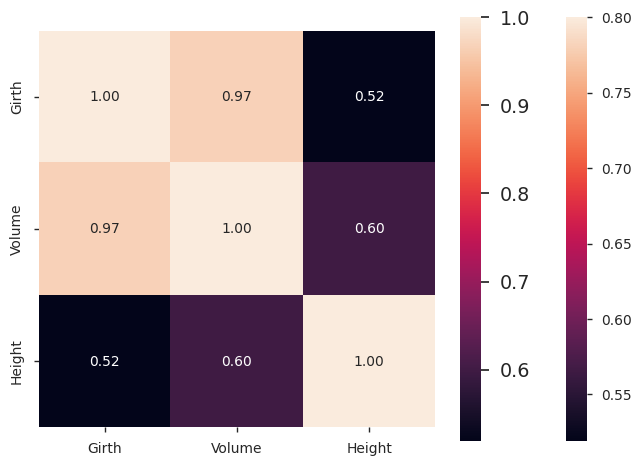

In [14]:
#Análisis de correlación

corrmat = bd.corr()
corrmat

sns.heatmap(corrmat, vmax=.8, square=True);

k = 3 # Número de variables.
cols = corrmat.nlargest(k, 'Girth')['Girth'].index
cm = np.corrcoef(bd[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

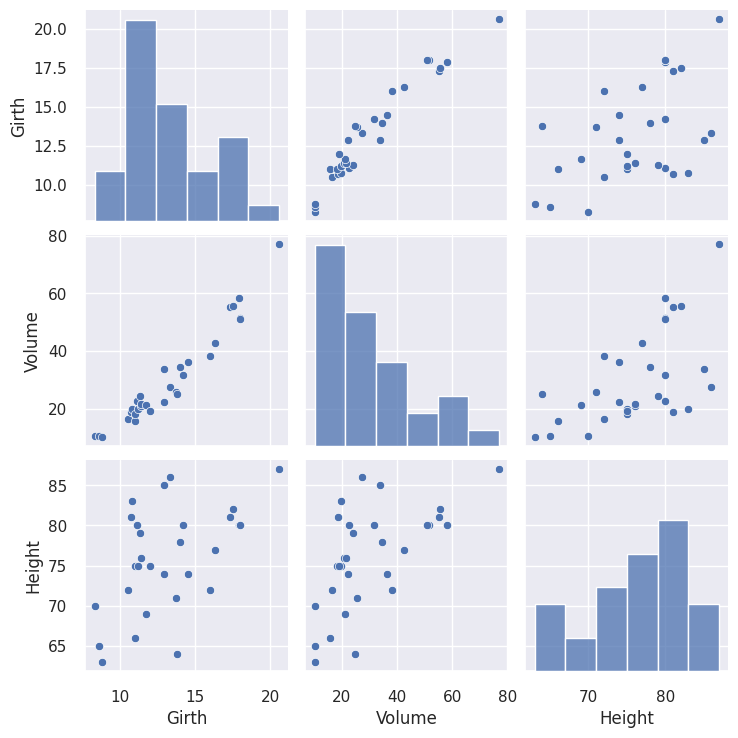

In [15]:
sns.set()
sns.pairplot(bd[cols], size = 2.5)
plt.show();